# Separate counts for Chr17

## Set environment

In [1]:
suppressMessages(suppressWarnings(source("config.R")))

In [2]:
FD_DAT="/data/reddylab/Kuei/out/CombEffect_STARR/count"
Sys.glob("/data/reddylab/Kuei/out/CombEffect_STARR/count/*/cnt_PER1*")

[1] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input1/cnt_PER1.bed"   
 [2] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input2/cnt_PER1.bed"   
 [3] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input3/cnt_PER1.bed"   
 [4] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input4/cnt_PER1.bed"   
 [5] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input5/cnt_PER1.bed"   
 [6] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input/cnt_PER1.bed"    
 [7] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX2_Dex/cnt_PER1.bed" 
 [8] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX2_DMSO/cnt_PER1.bed"
 [9] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX3_Dex/cnt_PER1.bed" 
[10] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX3_DMSO/cnt_PER1.bed"
[11] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX4_Dex/cnt_PER1.bed" 
[12] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX4_DMSO/cnt_PER1.bed"
[13] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX5_Dex/cnt_PER1.bed" 
[14] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX5_DMSO/cnt_PER1.bed"
[15] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX_Dex/cnt_PER1.bed"  
[16] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX_DMSO/cnt_PER1.bed"

In [3]:
FD_DAT="/data/reddylab/Kuei/out/CombEffect_STARR/count"
Sys.glob("/data/reddylab/Kuei/out/CombEffect_STARR/count/*/cnt_chr17*")

[1] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input1/cnt_chr17.bed"   
 [2] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input2/cnt_chr17.bed"   
 [3] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input3/cnt_chr17.bed"   
 [4] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input4/cnt_chr17.bed"   
 [5] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input5/cnt_chr17.bed"   
 [6] "/data/reddylab/Kuei/out/CombEffect_STARR/count/Input/cnt_chr17.bed"    
 [7] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX2_Dex/cnt_chr17.bed" 
 [8] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX2_DMSO/cnt_chr17.bed"
 [9] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX3_Dex/cnt_chr17.bed" 
[10] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX3_DMSO/cnt_chr17.bed"
[11] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX4_Dex/cnt_chr17.bed" 
[12] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX4_DMSO/cnt_chr17.bed"
[13] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX5_Dex/cnt_chr17.bed" 
[14] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX5_DMSO/cnt_chr17.bed"
[15] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX_Dex/cnt_chr17.bed"  
[16] "/data/reddylab/Kuei/out/CombEffect_STARR/count/TFX_DMSO/cnt_chr17.bed"

## Import separate counts of Input

In [11]:
### init: set column names and types
cnames = c("Chrom", "Start", "End") #, "Count")
ctypes = c(col_character(), col_double(), col_double(), col_double())

### init: set sample index
idx_samples = paste0("Input", 1:5)

### loop: import counts from Input (PER1)
fdiry = FD_DAT
fname = "cnt_PER1.bed"
lst_dat_per1 = lapply(idx_samples, function(idx_sample){
    ### set file path
    fpath = file.path(fdiry, idx_sample, fname)
    
    ### import data
    dat = read_tsv(
        fpath, 
        col_names = c(cnames, idx_sample), 
        col_types = ctypes)
    return(dat)
})

### loop: import counts from Input (Chr17)
fname = "cnt_chr17.bed"
lst_dat_chr17 = lapply(idx_samples, function(idx_sample){
    ### set file path
    fpath = file.path(fdiry, idx_sample, fname)
    
    ### import data
    dat = read_tsv(
        fpath, 
        col_names = c(cnames, idx_sample), 
        col_types = ctypes)
    return(dat)
})

### Joining all the data.frames
fun = function(df1, df2){full_join(df1, df2, by=cnames)}
dat_cnt_input_per1  = Reduce(fun, lst_dat_per1)
dat_cnt_input_chr17 = Reduce(fun, lst_dat_chr17)

**Check results**

In [14]:
head(dat_cnt_input_per1, 2)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5
chr17,8149040,8149982,1,NA,NA,1,NA
chr17,8149115,8150060,1,NA,NA,NA,NA


In [15]:
head(dat_cnt_input_chr17, 2)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5
chr17,10000160,10001059,1,NA,NA,NA,NA
chr17,10000167,10001087,1,NA,NA,NA,NA


## Import separate counts of Output (DMSO)

In [12]:
### init: set column names and types
cnames = c("Chrom", "Start", "End") #, "Count")
ctypes = c(col_character(), col_double(), col_double(), col_double())

### init: set sample index
idx_samples = paste0("TFX", 2:5, "_DMSO")

### loop: import counts from Input (PER1)
fdiry = FD_DAT
fname = "cnt_PER1.bed"
lst_dat_per1 = lapply(idx_samples, function(idx_sample){
    ### set file path
    fpath = file.path(fdiry, idx_sample, fname)
    
    ### import data
    dat = read_tsv(
        fpath, 
        col_names = c(cnames, idx_sample), 
        col_types = ctypes)
    return(dat)
})

### loop: import counts from Input (Chr17)
fname = "cnt_chr17.bed"
lst_dat_chr17 = lapply(idx_samples, function(idx_sample){
    ### set file path
    fpath = file.path(fdiry, idx_sample, fname)
    
    ### import data
    dat = read_tsv(
        fpath, 
        col_names = c(cnames, idx_sample), 
        col_types = ctypes)
    return(dat)
})

### Joining all the data.frames
fun = function(df1, df2){full_join(df1, df2, by=cnames)}
dat_cnt_dmso_per1  = Reduce(fun, lst_dat_per1)
dat_cnt_dmso_chr17 = Reduce(fun, lst_dat_chr17)

**Check results**

In [16]:
head(dat_cnt_dmso_per1, 2)

Chrom,Start,End,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
chr17,8149037,8150068,1,NA,NA,NA
chr17,8149037,8150069,1,NA,NA,NA


In [17]:
head(dat_cnt_dmso_chr17, 2)

Chrom,Start,End,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
chr17,10000013,10001044,1,NA,NA,NA
chr17,10000013,10001045,1,NA,NA,NA


## Import separate counts of Output (Dex)

In [13]:
### init: set column names and types
cnames = c("Chrom", "Start", "End") #, "Count")
ctypes = c(col_character(), col_double(), col_double(), col_double())

### init: set sample index
idx_samples = paste0("TFX", 2:5, "_Dex")

### loop: import counts from Input (PER1)
fdiry = FD_DAT
fname = "cnt_PER1.bed"
lst_dat_per1 = lapply(idx_samples, function(idx_sample){
    ### set file path
    fpath = file.path(fdiry, idx_sample, fname)
    
    ### import data
    dat = read_tsv(
        fpath, 
        col_names = c(cnames, idx_sample), 
        col_types = ctypes)
    return(dat)
})

### loop: import counts from Input (Chr17)
fname = "cnt_chr17.bed"
lst_dat_chr17 = lapply(idx_samples, function(idx_sample){
    ### set file path
    fpath = file.path(fdiry, idx_sample, fname)
    
    ### import data
    dat = read_tsv(
        fpath, 
        col_names = c(cnames, idx_sample), 
        col_types = ctypes)
    return(dat)
})

### Joining all the data.frames
fun = function(df1, df2){full_join(df1, df2, by=cnames)}
dat_cnt_dex_per1  = Reduce(fun, lst_dat_per1)
dat_cnt_dex_chr17 = Reduce(fun, lst_dat_chr17)

**Check results**

In [18]:
head(dat_cnt_dex_per1, 2)

Chrom,Start,End,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,8149050,8150005,1,NA,NA,NA
chr17,8149050,8150006,1,NA,NA,NA


In [19]:
head(dat_cnt_dex_chr17, 2)

Chrom,Start,End,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,10000156,10001172,2,NA,NA,NA
chr17,10000156,10001173,1,NA,NA,NA


## Count `#drop-out` across different  samples

**Input**

In [30]:
### combine data
lst_dat = list(
    dat_cnt_input_per1,
    dat_cnt_input_chr17
)
lst_name = c("(Input; PER1)", "(Input; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% 
        rowwise() %>% 
        mutate(cnt_na = sum(is.na(c(Input1, Input2, Input3, Input4, Input5))))
    return(dat)
})

In [24]:
lapply(lst_dat, function(dat){table(dat$cnt_na)})

$`(Input; PER1)`

  2   3   4 
  2  41 762 

$`(Input; Chr17)`

      0       1       2       3       4 
     17     498    8943  130652 2898643 


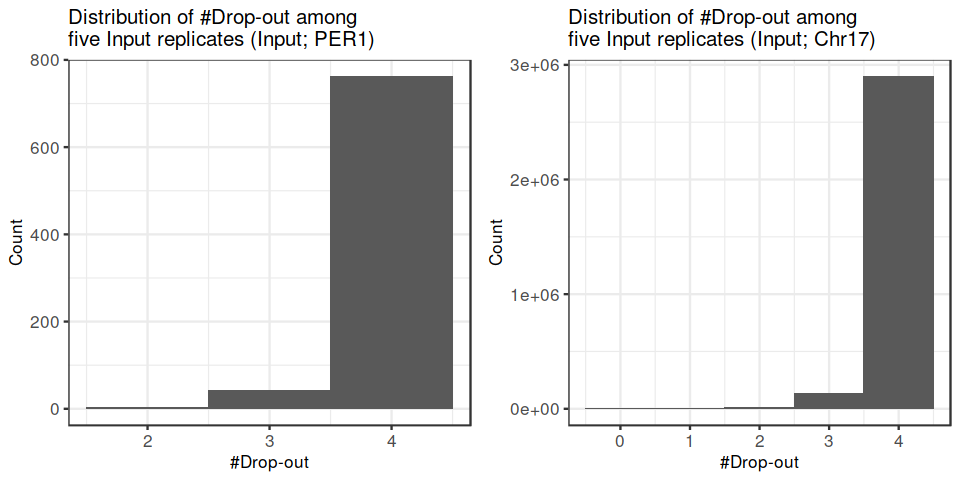

In [31]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=cnt_na)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="#Drop-out", 
            y="Count", 
            title=paste("Distribution of #Drop-out among\nfive Input replicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

**Output (DMSO)**

In [32]:
### combine data
lst_dat = list(
    dat_cnt_dmso_per1,
    dat_cnt_dmso_chr17
)
lst_name = c("(Output (DMSO); PER1)", "(Output (DMSO); Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% 
        rowwise() %>% 
        mutate(cnt_na = sum(is.na(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO))))
    return(dat)
})

In [33]:
lapply(lst_dat, function(dat){table(dat$cnt_na)})

$`(Output (DMSO); PER1)`

   1    2    3 
  14  122 1930 

$`(Output (DMSO); Chr17)`

      0       1       2       3 
   1448   13313  154392 3914674 


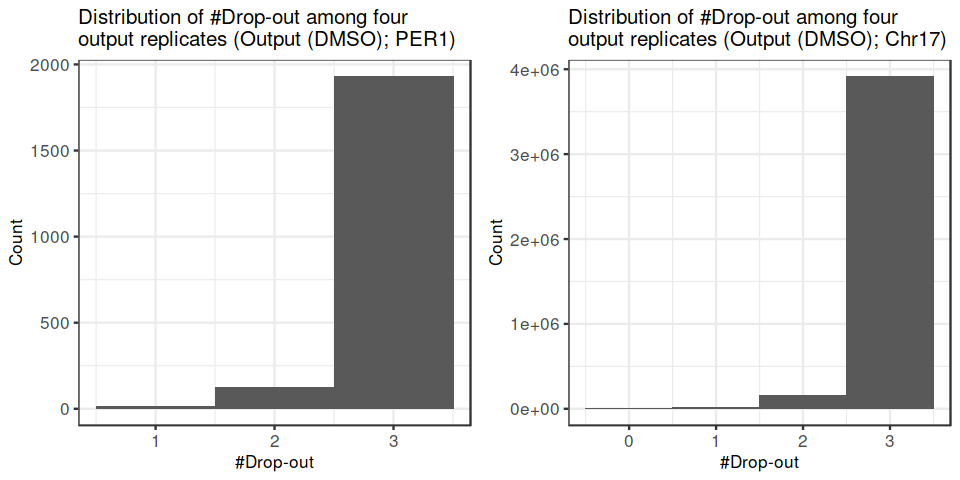

In [35]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=cnt_na)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="#Drop-out", 
            y="Count", 
            title=paste("Distribution of #Drop-out among four\noutput replicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

**Output (Dex)**

In [36]:
### combine data
lst_dat = list(
    dat_cnt_dex_per1,
    dat_cnt_dex_chr17
)
lst_name = c("(Output (Dex); PER1)", "(Output (Dex); Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% 
        rowwise() %>% 
        mutate(cnt_na = sum(is.na(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex))))
    return(dat)
})

In [37]:
lapply(lst_dat, function(dat){table(dat$cnt_na)})

$`(Output (Dex); PER1)`

   0    1    2    3 
  72  225  579 3951 

$`(Output (Dex); Chr17)`

      0       1       2       3 
   5407   30831  225161 4326588 


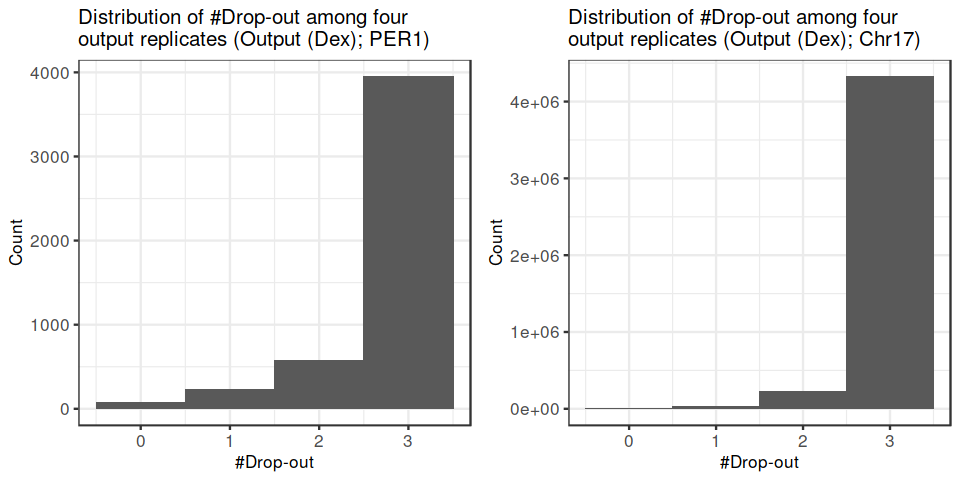

In [38]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=cnt_na)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="#Drop-out", 
            y="Count", 
            title=paste("Distribution of #Drop-out among four\noutput replicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

## Distribution of Count

**Input**

In [39]:
### combine data
lst_dat = list(
    dat_cnt_input_per1,
    dat_cnt_input_chr17
)
lst_name = c("(Input; PER1)", "(Input; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% gather(Sample, Count, -Chrom, -Start, -End) %>% na.omit
    return(dat)
})

In [40]:
lapply(lst_dat, function(dat){table(dat$Count)})

$`(Input; PER1)`

  1   2 
838  12 

$`(Input; Chr17)`

      1       2       3       4       5 
3127723   58961    2078      89       2 


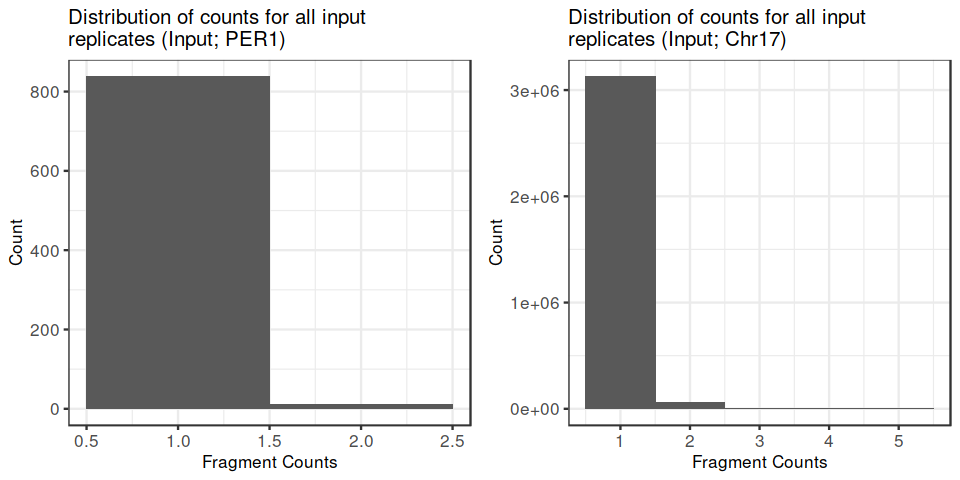

In [48]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=Count)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="Fragment Counts", 
            y="Count",
            title=paste("Distribution of counts for all input\nreplicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

**Output (DMSO)**

In [49]:
### combine data
lst_dat = list(
    dat_cnt_dmso_per1,
    dat_cnt_dmso_chr17
)
lst_name = c("(DMSO; PER1)", "(DMSO; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% gather(Sample, Count, -Chrom, -Start, -End) %>% na.omit
    return(dat)
})

In [50]:
lapply(lst_dat, function(dat){table(dat$Count)})

$`(DMSO; PER1)`

   1    2    3    4    5    6 
1810  306   65   24    9    2 

$`(DMSO; Chr17)`

      1       2       3       4       5       6       7       8       9      10 
3476978  590137  140648   40016   13037    4707    1836     835     380     209 
     11      12      13      14      15      16      17      18      19      20 
    126      80      50      41      25      25      17       7       8       7 
     21      22      23      24      28      30      32      35      36 
      4       4       1       2       3       1       3       1       1 


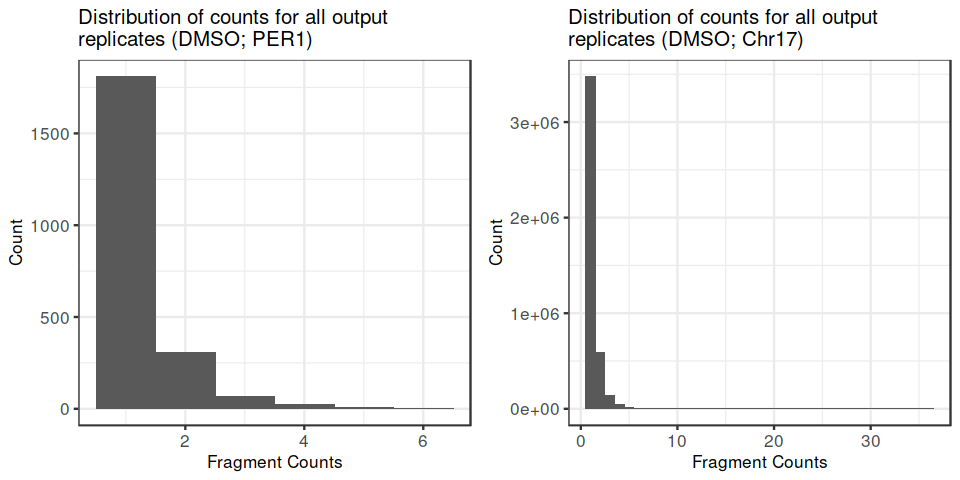

In [52]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=Count)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="Fragment Counts", 
            y="Count",
            title=paste("Distribution of counts for all output\nreplicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

**Output (Dex)**

In [54]:
### combine data
lst_dat = list(
    dat_cnt_dex_per1,
    dat_cnt_dex_chr17
)
lst_name = c("(Dex; PER1)", "(Dex; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% gather(Sample, Count, -Chrom, -Start, -End) %>% na.omit
    return(dat)
})

In [55]:
lapply(lst_dat, function(dat){table(dat$Count)})

$`(Dex; PER1)`

   1    2    3    4    5    6    7    8    9   10   11   12   13   19 
4549  965  301  121   65   28   13    9    9    6    3    1    1    1 

$`(Dex; Chr17)`

      1       2       3       4       5       6       7       8       9      10 
3955570  676485  170954   53687   19274    7810    3601    1611     817     489 
     11      12      13      14      15      16      17      18      19      20 
    233     166     105      69      37      31      17      14      11       7 
     21      22      23      24      25      27      28      29      31      32 
      5       5      10       5       4       3       1       2       1       1 
     34      35      36      38      41 
      2       1       1       1       1 


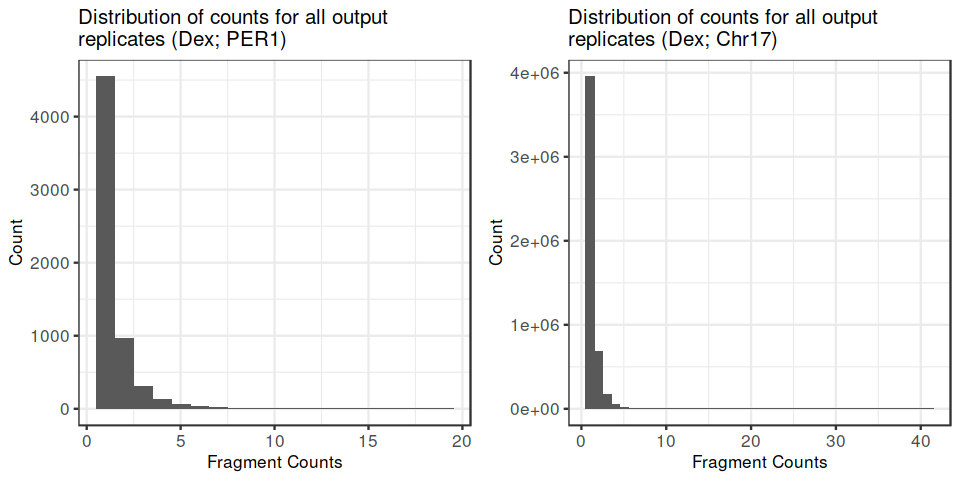

In [58]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=Count)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="Fragment Counts", 
            y="Count",
            title=paste("Distribution of counts for all output\nreplicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

## Mean-variance relationship

In [59]:
### combine data
lst_dat = list(
    dat_cnt_dmso_per1,
    dat_cnt_dmso_chr17
)
lst_name = c("(Output (DMSO); PER1)", "(Output (DMSO); Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% 
        rowwise() %>% 
        mutate(
            cnt_na = sum(is.na(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO))),
            Mean = mean(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE),
            SD   =   sd(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE)
        )
    return(dat)
})

In [60]:
lapply(lst_dat, function(dat){table(dat$cnt_na)})

$`(Output (DMSO); PER1)`

   1    2    3 
  14  122 1930 

$`(Output (DMSO); Chr17)`

      0       1       2       3 
   1448   13313  154392 3914674 


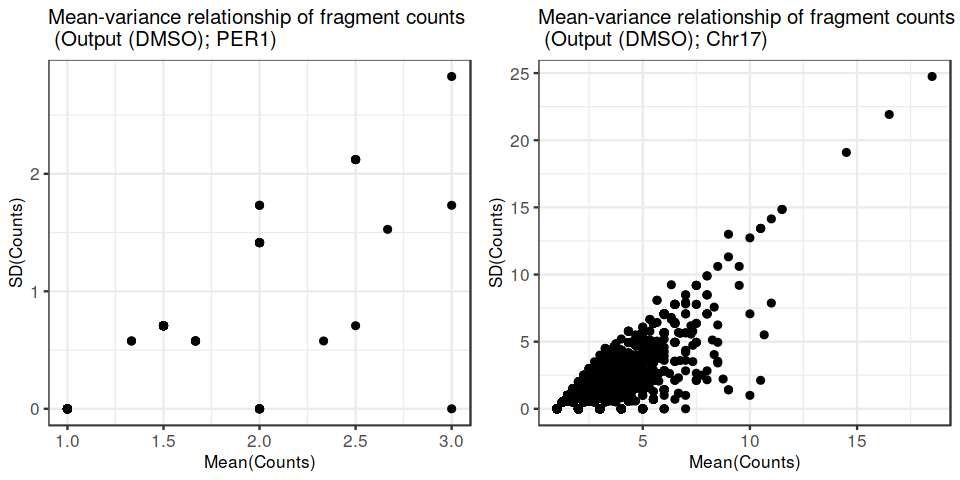

In [69]:
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = dat %>% 
        dplyr::filter(cnt_na <= 2) %>%
        ggplot(aes(x=Mean, y=SD)) +    
        geom_point() + 
        labs(
            x="Mean(Counts)", 
            y="SD(Counts)", 
            title=paste("Mean-variance relationship of fragment counts\n", idn)
        ) +
        theme_bw() +
        theme(
            title      = element_text(size=10),
            axis.title = element_text(size=10),
            axis.text  = element_text(size=10)
        )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

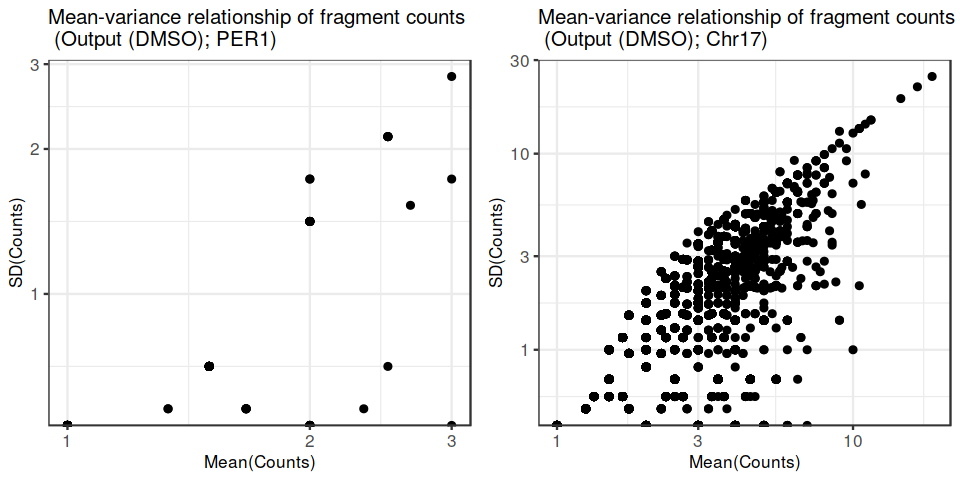

In [70]:
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = dat %>% 
        dplyr::filter(cnt_na <= 2) %>%
        ggplot(aes(x=Mean, y=SD)) +    
        geom_point() + 
        labs(
            x="Mean(Counts)", 
            y="SD(Counts)", 
            title=paste("Mean-variance relationship of fragment counts\n", idn)
        ) +
        theme_bw() +
        theme(
            title      = element_text(size=10),
            axis.title = element_text(size=10),
            axis.text  = element_text(size=10)
        ) +
        scale_x_log10() +
        scale_y_log10()
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

In [72]:
lapply(lst_dat, function(dat){
    dat %>% dplyr::filter(SD==0) %>% group_by(Mean) %>% summarise(Count=n())
})

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


Mean,Count
1,58
2,7
3,1
Mean,Count
1,86634
2,6494
3,720
4,87
5,18
6,3
